In [1]:
# Use black formatter
# %load_ext lab_black

import numpy as np
import random
from sklearn import datasets
from matplotlib import pyplot as plt

#### Ejecicio #1:    Operaciones Matriciales
Dada una matriz en formato numpy array, donde cada fila de la matriz representa un vector matemático: 
* Computar las normas l0, l1, l2, l-infinito
    * l0: número de elementos diferentes a cero en el vector
    * l1-l2: 
    ![](https://latex.codecogs.com/svg.latex?%7B%5Ccolor%7BOrange%7D%20%5Cleft%20%5C%7C%20x%20%5Cright%20%5C%7C_%7Bp%7D%20%3D%20%5Cleft%20%28%20%5Csum_%7B1%7D%5E%7Bn%7D%20%5Cleft%20%7C%20x_%7Bi%7D%20%5Cright%20%7C%5Ep%20%5Cright%20%29%5E%7B%5Ctfrac%7B1%7D%7Bp%7D%7D%7D)
    * l-infinito:
     ![](https://latex.codecogs.com/svg.latex?%7B%5Ccolor%7BOrange%7D%20%5Cleft%20%5C%7C%20x%20%5Cright%20%5C%7C_%7B%5Cinfty%7D%20%3D%20max_%7Bi%7D%20%5Cleft%20%7C%20x_%7Bi%7D%20%5Cright%20%7C%7D)

In [2]:
def calculate_l0(mat):
    """
    Calculate the LO of a matrix
    """
    return np.sum(np.where(mat != 0, 1, 0), axis=1)


def calculate_l(mat, p):
    """
    Calculate the Lp of a matrix
    """
    return np.sum(np.abs(mat) ** p, axis=1) ** (1 / p)


def calculate_l_inf(mat):
    """
    Calculate the L-infinity of a matrix
    """
    return np.max(np.abs(mat), axis=1)


test_mat = np.array([[1, -2, 0], [4, 0, -6], [7, 0, 0]])
print("l0:", calculate_l0(test_mat))
print("l1:", calculate_l(test_mat, 1))
print("l2:", calculate_l(test_mat, 2))
print("l-inf:", calculate_l_inf(test_mat))

l0: [2 2 1]
l1: [ 3. 10.  7.]
l2: [2.23606798 7.21110255 7.        ]
l-inf: [2 6 7]


#### Ejecicio #2:    Sorting
Dada una matriz en formato numpy array, donde cada fila de la matriz representa un vector matemático, se requiere computar la norma l2 de cada vector.
Una vez obtenida la norma, se debe ordenar las mísmas de mayor a menor. Finalmente, obtener la matriz original ordenada por fila según la norma l2.

_Todas las operaciones debe ser vectorizadas._

In [3]:
mat = np.array([[11, -12, 0], [4, 0, -8], [14, 0, 1], [5, -2, -11]])

mat_l2 = calculate_l(mat, 2)
sorted_indices = np.argsort(mat_l2)[::-1]
sorted_mat = mat[sorted_indices]

print("Matrix:\n", mat)
print("L2 values:\n", mat_l2)
print("Sorted Matrix:\n", sorted_mat)

Matrix:
 [[ 11 -12   0]
 [  4   0  -8]
 [ 14   0   1]
 [  5  -2 -11]]
L2 values:
 [16.2788206   8.94427191 14.03566885 12.24744871]
Sorted Matrix:
 [[ 11 -12   0]
 [ 14   0   1]
 [  5  -2 -11]
 [  4   0  -8]]


#### Ejecicio #3:    Indexing
El objetivo es construir un índice para identificadores de usuarios, es decir _id2idx_ e _idx2id_.
Para ello crear una clase, donde el índice se genere en el constructor. Armar métodos _get_users_id_ y _get_users_idx_.

* Identificadores de usuarios : users_id = [15, 12, 14, 10, 1, 2, 1]
* Índice de usuarios : users_id = [0, 1, 2, 3, 4, 5, 4]
```
id2idx =  [-1   4   5  -1  -1  -1  -1  -1  -1  -1   3  -1   1  -1   2   0]
          [ 0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]

id2idx[15] -> 0 ; id2idx[12] -> 1 ; id2idx[3] -> -1
idx2id[0] -> 15 ; idx2id[4] -> 1
```

In [4]:
class User:
    index_count = 0

    def __init__(self, id):
        self.id = id
        self.index = User.index_count
        User.index_count += 1

    def get_id(self):
        return self.id

    def get_index(self):
        return self.index


class Users:
    def __init__(self, users_ids):
        self.set_users(users_ids)

    def set_users(self, users_ids):
        self.users = [User(id) for id in users_ids]

    def get_users_id(self):
        return [user.get_id() for user in self.users]

    def get_users_index(self):
        return [user.get_index() for user in self.users]


users_ids = [-1, 4, 5, -1, -1, -1, -1, -1, -1, -1, 3, -1, 1, -1, 2, 0]
users = Users(users_ids)

print("Users IDs:", users.get_users_id())
print("Users Indices:", users.get_users_index())

Users IDs: [-1, 4, 5, -1, -1, -1, -1, -1, -1, -1, 3, -1, 1, -1, 2, 0]
Users Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


#### Ejecicio #4:    Precision, Recall, Accuracy
En los problemas de clasificación, se cuenta con dos arreglos, la **verdad** (ground truth) y la **predicción** (prediction). 
Cada elemento de los arreglos puede tomar dos valores: _True_ (representado por 1) y _False_ (representado por 0). 
Por lo tanto, se pueden definir cuatro variables:
* True Positive (TP): la verdad es 1 y la predicción es 1.
* True Negative (TN): la verdad es 0 y la predicción es 0.
* False Negative (FN): la verdad es 1 y la predicción es 0.
* False Positive (FP): la verdad es 0 y la predicción es 1.

A partir de esas cuatro variables, se definen las siguientes métricas:
* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)

Para los siguientes arreglos, representando la **verdad** y la **predicción**,
calcular las métricas anteriores con operaciones vectorizadas en NumPy.
* truth = [1,1,0,1,1,1,0,0,0,1]
* prediction = [1,1,1,1,0,0,1,1,0,0]

In [5]:
def var_calculator(truth, pred, variable):
    """
    Calculate TP, TN, FN or FP of an array
    """
    options = {
        "TP": [truth, pred],
        "TN": [np.logical_not(truth), np.logical_not(pred)],
        "FN": [truth, np.logical_not(pred)],
        "FP": [np.logical_not(truth), pred],
    }

    processed_truth, processed_pred = options[variable]
    return np.where(np.logical_and(processed_truth, processed_pred), 1, 0)


TP = lambda truth, pred: var_calculator(truth, pred, "TP")
TN = lambda truth, pred: var_calculator(truth, pred, "TN")
FN = lambda truth, pred: var_calculator(truth, pred, "FN")
FP = lambda truth, pred: var_calculator(truth, pred, "FP")


def precision(truth, pred):
    """
    Calculate the precision of an array
    """
    tp = np.sum(TP(truth, pred))
    fp = np.sum(FP(truth, pred))
    return tp / (tp + fp)


def recall(truth, pred):
    """
    Calculate the recall of an array
    """
    tp = np.sum(TP(truth, pred))
    fn = np.sum(FN(truth, pred))
    return tp / (tp + fn)


def accuracy(truth, pred):
    """
    Calculate the accuracy of an array
    """
    tp = np.sum(TP(truth, pred))
    tn = np.sum(TN(truth, pred))
    fp = np.sum(FP(truth, pred))
    fn = np.sum(FN(truth, pred))
    return (tp + tn) / (tp + tn + fn + fp)


truth = np.array([[1, 1, 0, 1, 1, 1, 0, 0, 0, 1]])
prediction = np.array([[1, 1, 1, 1, 0, 0, 1, 1, 0, 0]])

print("Tr:", truth)
print("Pr:", prediction)
print()
print("TP:", TP(truth, prediction))
print("TN:", TN(truth, prediction))
print("FN:", FN(truth, prediction))
print("FP:", FP(truth, prediction))
print()
print("Precision:", precision(truth, prediction))
print("Recall:", recall(truth, prediction))
print("Accuracy:", accuracy(truth, prediction))

Tr: [[1 1 0 1 1 1 0 0 0 1]]
Pr: [[1 1 1 1 0 0 1 1 0 0]]

TP: [[1 1 0 1 0 0 0 0 0 0]]
TN: [[0 0 0 0 0 0 0 0 1 0]]
FN: [[0 0 0 0 1 1 0 0 0 1]]
FP: [[0 0 1 0 0 0 1 1 0 0]]

Precision: 0.5
Recall: 0.5
Accuracy: 0.4


#### Ejecicio #5:    Average Query Precision
En information retrieval o search engines, en general contamos con queries “q” y para cada “q” una lista de documentos que son verdaderamente relevantes. 
Para evaluar un search engine, es común utilizar la métrica **average query precision**.
Tomando de referencia el siguiente ejemplo, calcular la métrica con NumPy utilizando operaciones vectorizadas.
```
q_id =             [1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4]
predicted_rank =   [0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3]
truth_relevance =  [T, F, T, F, T, T, T, F, F, F, F, F, T, F, F, T] 
```
* Precision para q_id 1 = 2 / 4
* Precision para q_id 2 = 3 / 3
* Precision para q_id 3 = 0 / 5
* Precision para q_id 4 = 2 / 4

**_average query precision_** = ((2/4) + (3/3) + (0/5) + (2/4)) / 4

In [6]:
q_id = np.array([[1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4]])
predicted_rank = np.array([[0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3]])
truth_relevance =  np.array([[True, False, True, False, True, True, True, False, False, False, False, False, True, False, False, True]])  # fmt: skip


def average_query_precision(q_id, predicted_rank, truth_relevance):
    """
    Calculate the average query precision of an array
    """
    # Get number of results for each query
    start = np.where(predicted_rank == 0)[1]
    counts = np.append(start[1:], predicted_rank.size) - start

    # Create a map from each query id to the number of results
    mapper_dict = {i + 1: value for i, value in enumerate(counts)}
    calc_den = np.vectorize(lambda entry: mapper_dict.get(entry, entry))

    # Calculate the average query precision using the formula
    return np.sum(truth_relevance / calc_den(q_id)) / start.size


average_query_precision(q_id, predicted_rank, truth_relevance)

0.49999999999999994

#### Ejecicio #6:    Distancia a Centroides
Dada una nube de puntos _X_ y centroides _C_, obtener la distancia entre
cada vector _X_ y los centroides utilizando operaciones vectorizadas y broadcasting en NumPy.
Utilizar como referencia los siguientes valores:
```
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
C = [[1, 0, 0], [0, 1, 1]]   
```

In [7]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C = np.array([[1, 0, 0], [0, 1, 1]])


def calculate_distance(X, C):
    """
    Calculate the distance between each row of X and each row of C
    """
    C_rows, C_cols = C.shape
    return np.sqrt(np.sum((X - C.reshape(C_rows, 1, C_cols)) ** 2, axis=2)).T


calculate_distance(X, C)

array([[ 3.60555128,  2.44948974],
       [ 8.36660027,  7.54983444],
       [13.45362405, 12.72792206]])

#### Ejecicio #7:    Etiquetar Cluster
Obtener para cada fila en _X_, el índice de la fila en _C_ con distancia euclídea más pequeña. 
Es decir, para cada fila en _X_, determinar a qué cluster pertenece en C.
_Hint_: usar np.argmin.

In [8]:
np.argmin(calculate_distance(X, C), axis=1)

array([1, 1, 1])

#### Ejercicio #8:   Implementación Básica de K-means
K-means es uno de los algoritmos más básicos en Machine Learning no supervisado.
Es un algoritmo de clusterización, que agrupa datos que comparten características similares.
Recordemos que entendemos datos como _n_ realizaciones del vector aleatorio _X_.

El algoritmo funciona de la siguiente manera:
1. El usuario selecciona la cantidad de clusters a crear _n_.
2. Se seleccionan _n_ elementos aleatorios de _X_ como posiciones iniciales del los centroides _C_.
3. Se calcula la distancia entre todos los puntos en _X_ y todos los puntos en _C_.
4. Para cada punto en _X_ se selecciona el centroide más cercano de _C_.
5. Se recalculan los centroides _C_ a partir de usar las filas de _X_ que pertenecen a cada centroide. 
6. Se itera entre 3 y 5 una cantidad fija de veces o hasta que la posición de los centroides no cambie dada una tolerancia.

Se debe por lo tanto implementar la función k_means(X, n) de manera tal que, al finalizar, devuelva la posición de los centroides
y a qué cluster pertenece cada fila de _X_. 

_Hint_: para (2) utilizar funciones de np.random, para (3) y (4) usar los ejercicios anteriores, 
para (5) es válido utilizar un for. Iterar 10 veces entre (3) y (5).  

In [9]:
NUM_X = 100
NUM_ITERATIONS = 10
POINTS_RANGE = [0, 10]


def k_means(X, n):
    """
    K-means algorithm
    """
    # Select n elements as centroids
    rand_indices = [random.randint(0, NUM_X - 1) for _ in range(n)]
    C = X[rand_indices]
    clusters_indices = []

    # Iterate NUM_ITERATIONS times
    for _ in range(NUM_ITERATIONS):
        # Calculate distances between points and centroids
        distances = calculate_distance(X, C)

        # Get the index of the closest centroid for each point
        clusters_indices = np.argmin(distances, axis=1)

        # Calculate the new centroids
        for i in range(n):
            clusters_indices_i = np.where(clusters_indices == i)[0]
            C[i] = np.mean(X[clusters_indices_i], axis=0)

    return C, clusters_indices


# Ask user for num_clusters or use a fixed value
# num_clusters = int(input("Number of clusters: "))
num_clusters = 3

# Generate uniform points or points related to clusters
# X = np.random.uniform(low=POINTS_RANGE[0], high=POINTS_RANGE[1], size=(NUM_X, 2))
X = datasets.make_blobs(
    n_samples=NUM_X,
    n_features=2,
    center_box=(POINTS_RANGE[0], POINTS_RANGE[1]),
)[0]

C, clusters_indices = k_means(X, num_clusters)

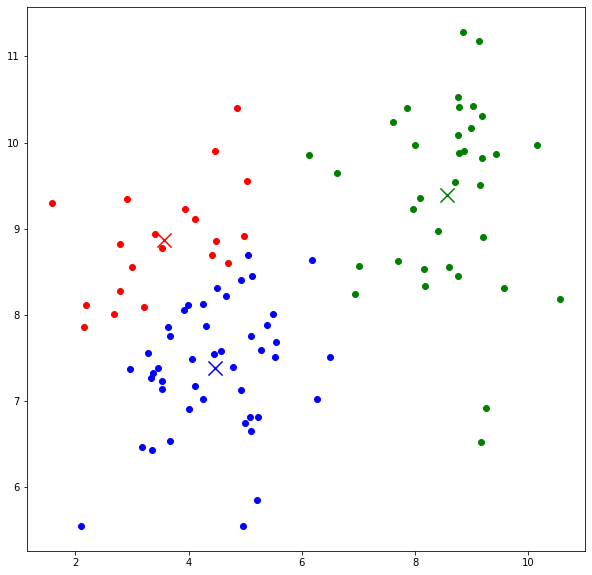

In [10]:
colors = [
    "red",
    "green",
    "blue",
    "purple",
    "black",
    "orange",
    "pink",
    "brown",
    "gray",
    "yellow",
]
indices = lambda i: np.where(clusters_indices == i)[0]

plt.figure(figsize=(10, 10))

for i in range(num_clusters):
    plt.scatter(X[indices(i), 0], X[indices(i), 1], c=colors[i])
    plt.scatter(C[i, 0], C[i, 1], c=colors[i], marker="x", s=200)

plt.show()

#### Ejercicio #9:   Computar Métricas con \_\_call__
En problemas de machine learning, es muy común que para cada predicción que obtenemos en nuestro dataset de verificacion y evaluacion, almacenemos en arreglos de numpy el resultado de dicha predicción, junto con el valor verdadero y parámetros auxiliares (como el ranking de la predicción y el query id). 

Luego de obtener todas las predicciones, podemos utilizar la información almacenada en los arreglos de numpy, para calcular todas las métricas que queremos medir en nuestro sistema. 

Una buena práctica para implementar esto en Python, es crear clases que hereden de una clase Metric “base” y que cada métrica implemente el método \_\_call__.

Utilizar herencia, operador \_\_call__ y _kwargs_, para escribir un programa que permita calcular todas las métricas de los ejercicios anteriores mediante un for.

In [11]:
class Metric:
    """
    Abstract class for metrics
    """

    def __init__(self, name):
        self.name = name

    def __call__(self):
        raise NotImplementedError("__call__ method not implemented")


class Precision(Metric):
    """
    Precision metric
    """

    def __init__(self):
        super().__init__("Precision")

    def __call__(self, **kwargs):
        return precision(kwargs["pred"], kwargs["truth"])


class Recall(Metric):
    """
    Recall metric
    """

    def __init__(self):
        super().__init__("Recall")

    def __call__(self, **kwargs):
        return recall(kwargs["pred"], kwargs["truth"])


class Accuracy(Metric):
    """
    Accuracy metric
    """

    def __init__(self):
        super().__init__("Accuracy")

    def __call__(self, **kwargs):
        return accuracy(kwargs["pred"], kwargs["truth"])


class AverageQueryPrecision(Metric):
    """
    Average Query Precision metric
    """

    def __init__(self):
        super().__init__("Average Query Precision")

    def __call__(self, **kwargs):
        return average_query_precision(kwargs["q_id"], kwargs["pred"], kwargs["truth"])


metrics = [Precision(), Recall(), Accuracy(), AverageQueryPrecision()]
truth = np.array([[1, 1, 0, 1, 1, 1, 0, 0, 0, 1]])
pred = np.array([[1, 1, 1, 1, 0, 0, 1, 1, 0, 0]])

for i, metric in enumerate(metrics):
    if (
        i == 3
    ):  # required because AverageQueryPrecision uses different type of parameters
        q_id = np.array([[1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4]])
        predicted_rank = np.array([[0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3]])
        truth_relevance =  np.array([[True, False, True, False, True, True, True, False, False, False, False, False, True, False, False, True]])  # fmt: skip
        print(
            metric.name, metric(pred=predicted_rank, truth=truth_relevance, q_id=q_id)
        )
    else:
        print(metric.name, metric(pred=prediction, truth=truth))

Precision 0.5
Recall 0.5
Accuracy 0.4
Average Query Precision 0.49999999999999994



#### Ejercicio #10:   Dataset a NumPy Estructurado - Patrón de Diseño Singleton (opcional)
Para éste ejercicio vamos a descargar un dataset de Kaggle. Es recomendable que se creen una cuenta porque es un lugar de donde potencialmente vamos a descargar muchos recursos.

Pueden descargar el dataset desde [aquí](https://www.kaggle.com/rounakbanik/the-movies-dataset/data?select=ratings.csv).

El objetivo del ejercicio es crear una clase que permita realizar las siguientes funciones sobre el dataset:
* Crear la estructura de un structured numpy array para el dataset.
* Leer el csv, almacenar la información en el array estructurado.
* Guardar el array estructurado en formato .pkl.
* Crear una instancia singleton del array estructurado (utilizando \_\_new__ e \_\_init__).
* Al crear la instancia, si se encuentra el .pkl cargar desde el pkl. Si el .pkl no está, comenzar por transformar el .csv en .pkl y luego levantar la información.
* Encontrar una forma de optimizar la operación usando generators [opcional].
 